# 天池大赛·印象盐城

初赛提供2012年1月-2017年10月盐城分车型销量配置数据。
第一阶段需要参赛者预测2017年11月盐城分车型销量数据，第二阶段需要参赛者预测2017年12月盐城分车型销量数据。

### 一、首先加载所需要的库

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 二、加载文件

In [21]:
train = pd.read_csv('[new] yancheng_train_20171226.csv', low_memory=False)
test = pd.read_csv('yancheng_testA_20171225.csv')
train.head()

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track
0,201609,289403,94,12,2,1,1,1,6,MT,...,170,4440,1833,1545,1695,1320,5,2700,1556,1562
1,201609,745137,435,637,3,2,1,2,6,DCT,...,159,4534,1823,1483,1711,1336,5,2648,1553,1544
2,201609,714860,180,831,3,2,2,3,6,AT,...,176,4720,1815,1465,1860,1459,5,2770,1579,1589
3,201609,175962,40,750,3,2,1,4,6,AT,...,155,4475,1706,1469,1625,1145,5,2603,1460,1500
4,201609,270690,19,98,2,3,3,1,5,MT,...,146.5,4415,1685,1850,1825,1236,5,2720,1420,1440


经过检查发现训练集中没有缺失值

In [22]:
train[train.isnull().values==True]

,sale_date,class_id,sale_quantity,brand_id,compartment,type_id,level_id,department_id,TR,gearbox_type,...,engine_torque,car_length,car_width,car_height,total_quality,equipment_quality,rated_passenger,wheelbase,front_track,rear_track


In [23]:
test.head()

,predict_date,class_id,predict_quantity
0,201711,103507,NaN
1,201711,124140,NaN
2,201711,125403,NaN
3,201711,136916,NaN
4,201711,169673,NaN


### 三、各字段数据的含义

| 字段 | 含义 | 示例 |
| ---- | ---- | ---- |
| sale_date | 销售日期 | 201201 |
| class_id | 车型ID | 234567 |
| sale_quantity | 销量 | 15 |
| brand_id | 品牌ID | 234 |
| compartment | 厢数 | 3 |
| type_id | 车型类别ID | 1 |
| level_id | 车型级别ID | 1 |
| department_id | 车型系别ID | 1 |
| TR | 变速器档位 | 6 |
| gearbox_type | 变速器形式 | AT |
| displacement | 排量 | 2.5 |
| if_charging | 是否增压 | L |
| price_level | 成交段 | 35-50W（“W”：万元，“WL”：万元以下） |
| driven_type_id | 驱动形式ID | 1 |
| fuel_type_id | 燃料种类ID | 1 |
| newenergy_type_id | 新能源类型ID | 1 |
| emission_standards_id | 排放标准ID | 1 |
| if_MPV_id | 是否微客MPV | 1 |
| if_luxurious_id | 是否豪华ID | 1 |
| power | 功率 | 160 |
| cylinder_number | 缸数 | 6 |
| engine_torque | 发动机扭矩 | 250 |
| car_length | 车长 | 4531 |
| car_width | 车宽 | 1817 |
| car_height | 车高 | 1421 |
| total_quality | 总质量 | 1980 |
| equipment_quality | 整备质量 | 1565 |
| rated_passenger | 额定载客 | 5 |
| wheelbase | 轴距 | 2760 |
| front_track | 前轮距 | 1500 |
| rear_track | 后轮距 | 1529 |

### 查看车辆某些属性与销量的关系

In [61]:
labels = ['power', 'sale_quantity']
trainPower = train[labels]
trainPower = trainPower[0:17931]
# trainPower.index[17931:17933]
trainPower['power'].astype('float32')
trainPower = trainPower.groupby(trainPower['power']).agg('sum').reset_index()
plt.bar(trainPower['power'], trainPower['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('power')
plt.show()

ValueError: could not convert string to float: '81/70'

##### 长度

可以发现在4600左右销量最好。

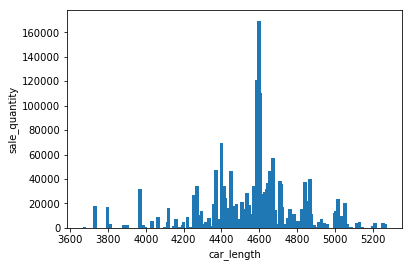

In [28]:
labels = ['car_length', 'sale_quantity']
trainLength = train[labels]
trainLength['car_length'].astype('float32')
trainLength = trainLength.groupby(trainLength['car_length']).agg('sum').reset_index()
plt.bar(trainLength['car_length'], trainLength['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('car_length')
plt.show()

##### 宽度

可以发现在1780左右销量最好。

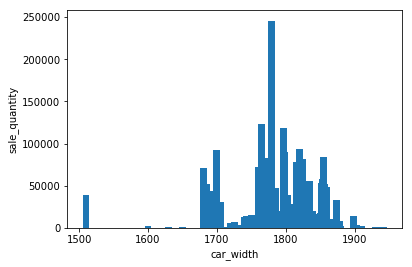

In [32]:
labels = ['car_width', 'sale_quantity']
trainWidth = train[labels]
trainWidth['car_width'].astype('float32')
trainWidth = trainWidth.groupby(trainWidth['car_width']).agg('sum').reset_index()
plt.bar(trainWidth['car_width'], trainWidth['sale_quantity'], width = 10)
plt.ylabel('sale_quantity')
plt.xlabel('car_width')
plt.show()

##### 高度

在高度为1460左右销量最高

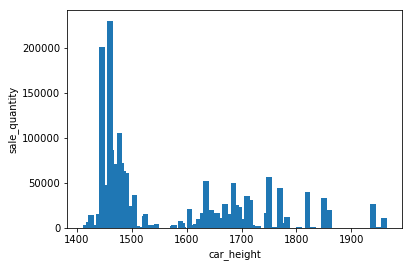

In [33]:
labels = ['car_height', 'sale_quantity']
trainHeight = train[labels]
trainHeight['car_height'].astype('float32')
trainHeight = trainHeight.groupby(trainHeight['car_height']).agg('sum').reset_index()
plt.bar(trainHeight['car_height'], trainHeight['sale_quantity'], width = 10)
plt.ylabel('sale_quantity')
plt.xlabel('car_height')
plt.show()

##### 质量

在1700到1850左右最受欢迎

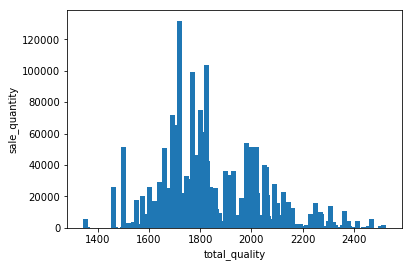

In [37]:
labels = ['total_quality', 'sale_quantity']
trainQuality = train[labels]
trainQuality['total_quality'].astype('float32')
trainQuality = trainQuality.groupby(trainQuality['total_quality']).agg('sum').reset_index()
plt.bar(trainQuality['total_quality'], trainQuality['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('total_quality')
plt.show()

##### 装备质量

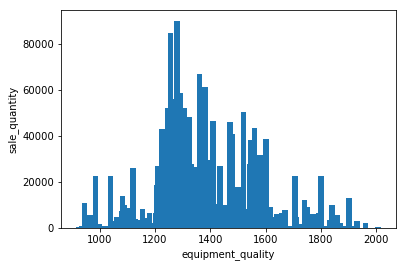

In [38]:
labels = ['equipment_quality', 'sale_quantity']
trainEQuality = train[labels]
trainEQuality['equipment_quality'].astype('float32')
trainEQuality = trainEQuality.groupby(trainEQuality['equipment_quality']).agg('sum').reset_index()
plt.bar(trainEQuality['equipment_quality'], trainEQuality['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('equipment_quality')
plt.show()

##### 轴距

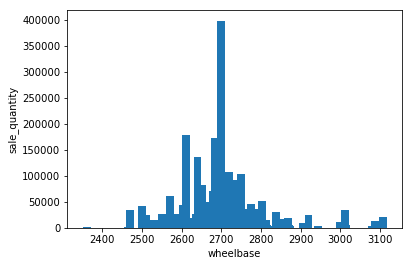

In [39]:
labels = ['wheelbase', 'sale_quantity']
trainWheelbase = train[labels]
trainWheelbase['wheelbase'].astype('float32')
trainWheelbase = trainWheelbase.groupby(trainWheelbase['wheelbase']).agg('sum').reset_index()
plt.bar(trainWheelbase['wheelbase'], trainWheelbase['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('wheelbase')
plt.show()

##### 前轮距

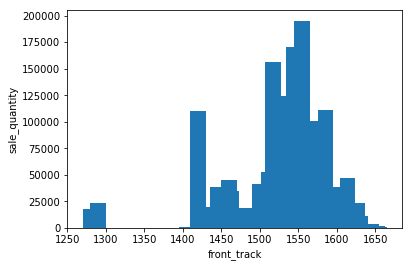

In [40]:
labels = ['front_track', 'sale_quantity']
trainFtrack = train[labels]
trainFtrack['front_track'].astype('float32')
trainFtrack = trainFtrack.groupby(trainFtrack['front_track']).agg('sum').reset_index()
plt.bar(trainFtrack['front_track'], trainFtrack['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('front_track')
plt.show()

##### 后轮距

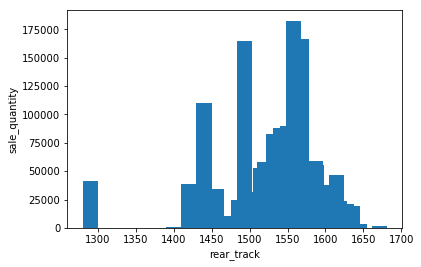

In [41]:
labels = ['rear_track', 'sale_quantity']
trainRtrack = train[labels]
trainRtrack['rear_track'].astype('float32')
trainRtrack = trainRtrack.groupby(trainRtrack['rear_track']).agg('sum').reset_index()
plt.bar(trainRtrack['rear_track'], trainRtrack['sale_quantity'], width = 20)
plt.ylabel('sale_quantity')
plt.xlabel('rear_track')
plt.show()